## 6.6 Sourcing & Analyzing Time Series Data

### Import Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose

### Import Data

In [2]:
# Create a path
path = r'C:\Users\ariel\OneDrive\Desktop\School work\Achievement 6'

In [3]:
# Importing data set
df = pd.read_csv(os.path.join(path, 'Data', 'cardatanew.csv'), index_col=False)

In [4]:
df.head()

Unnamed: 0   ID   Source  Severity           Start_Time  \
0           0  A-1  Source2         3  2016-02-08 05:46:00   
1           1  A-2  Source2         2  2016-02-08 06:07:59   
2           2  A-3  Source2         2  2016-02-08 06:49:27   
3           3  A-4  Source2         3  2016-02-08 07:23:34   
4           4  A-5  Source2         2  2016-02-08 07:39:07   

              End_Time  Start_Lat  Start_Lng  Distance(mi)  \
0  2016-02-08 11:00:00  39.865147 -84.058723          0.01   
1  2016-02-08 06:37:59  39.928059 -82.831184          0.01   
2  2016-02-08 07:19:27  39.063148 -84.032608          0.01   
3  2016-02-08 07:53:34  39.747753 -84.205582          0.01   
4  2016-02-08 08:09:07  39.627781 -84.188354          0.01   

                                         Description  ... Turning_Loop  Year  \
0  Right lane blocked due to accident on I-70 Eas...  ...        False  2016   
1  Accident on Brice Rd at Tussing Rd. Expect del...  ...        False  2016   
2  Accident on OH-32 State Route 32 Westbound at ...  ...        False  2016   
3  Accident on I-75 Southbound at Exits 52 52B US...  ...        False  2016   
4  Accident on McEwen Rd at OH-725 Miamisburg Cen...  ...        False  2016   

  Month Day Severity Scale     Weather_Category  Temperature_Category  Hour  \
0     2   8       Moderate        Rainy/Drizzly              Moderate     5   
1     2   8       Moderate        Rainy/Drizzly              Moderate     6   
2     2   8       Moderate      Cloudy/Overcast              Moderate     6   
3     2   8       Moderate  Clear/Partly Cloudy              Moderate     7   
4     2   8       Moderate  Clear/Partly Cloudy              Moderate     7   

   Time_of_Day  State_Full  
0        Night        Ohio  
1      Morning        Ohio  
2      Morning        Ohio  
3      Morning        Ohio  
4      Morning        Ohio  

[5 rows x 46 columns]

In [5]:
df.shape

(6976702, 46)

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Source', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Year', 'Month', 'Day', 'Severity Scale',
       'Weather_Category', 'Temperature_Category', 'Hour', 'Time_of_Day',
       'State_Full'],
      dtype='object')

In [7]:
# Remove unnamed column
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Year',
       'Month', 'Day', 'Severity Scale', 'Weather_Category',
       'Temperature_Category', 'Hour', 'Time_of_Day', 'State_Full'],
      dtype='object')

### Creating a subset of data with relevant columns for a time series analysis

In [9]:
# Subset the relevant columns for time series analysis
df_subset = df[['Start_Time', 'Severity', 'Year', 'Month', 'Day', 'Time_of_Day']]

In [10]:
# Convert 'Start_Time' to datetime format
df_subset['Start_Time'] = pd.to_datetime(df_subset['Start_Time'])

In [11]:
# Set 'Start_Time' as the index for time series analysis
df_subset.set_index('Start_Time', inplace=True)

In [12]:
# Reset the index for further analysis
df_subset = df_subset.reset_index()

### Create a line chart of the data

In [13]:
# Resample by month and calculate the mean severity
df_subset['Year-Month'] = df_subset['Start_Time'].dt.to_period('M')
severity_by_month = df_subset.groupby('Year-Month')['Severity'].mean()

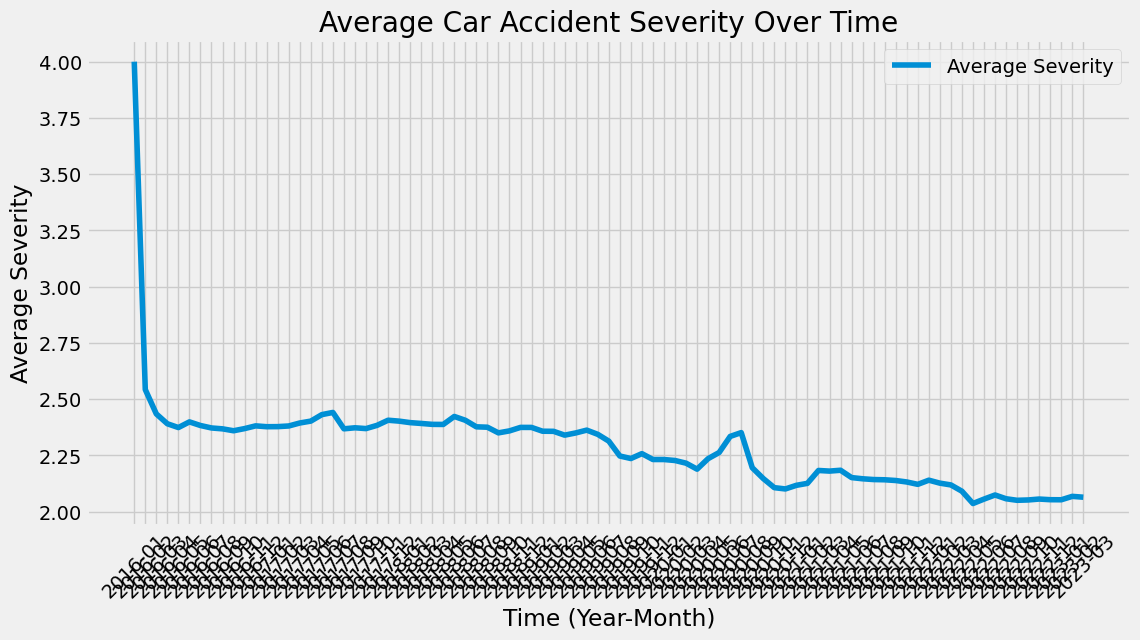

In [14]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(severity_by_month.index.astype(str), severity_by_month, label='Average Severity')
plt.title('Average Car Accident Severity Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [15]:
# Group by 'Start_Time' and count the number of accidents per day/month
df_subset['Date'] = df_subset['Start_Time'].dt.date  # Extract the date
accidents_per_day = df_subset.groupby('Date').size()

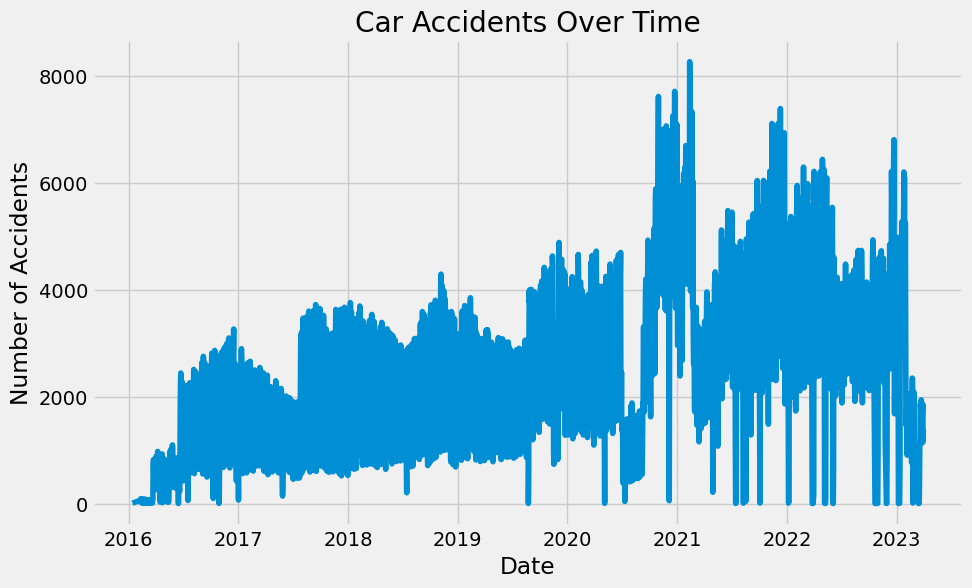

In [16]:
# Plot the accidents over time
plt.figure(figsize=(10, 6))
accidents_per_day.plot(kind='line')
plt.title('Car Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

### Time Series Analysis: Decompose the Data's Components

In [17]:
# Decompose the time series
decomposition = seasonal_decompose(severity_by_month, model='additive', period=12)  # assuming monthly data

In [18]:
# Extract Year-Month and ensure it's a Period object with the correct frequency
df_subset['Year-Month'] = df_subset['Start_Time'].dt.to_period('M')

In [19]:
# Group by the 'Year-Month' period and calculate the mean severity
severity_by_month = df_subset.groupby('Year-Month')['Severity'].mean()

In [20]:
# Decompose the time series
decomposition = seasonal_decompose(severity_by_month, model='additive', period=12)  # assuming monthly data

In [21]:
# Convert the 'Year-Month' Period index to datetime for plotting
severity_by_month.index = severity_by_month.index.to_timestamp()

In [22]:
# Decompose the time series
decomposition = seasonal_decompose(severity_by_month, model='additive', period=12)  # assuming monthly data

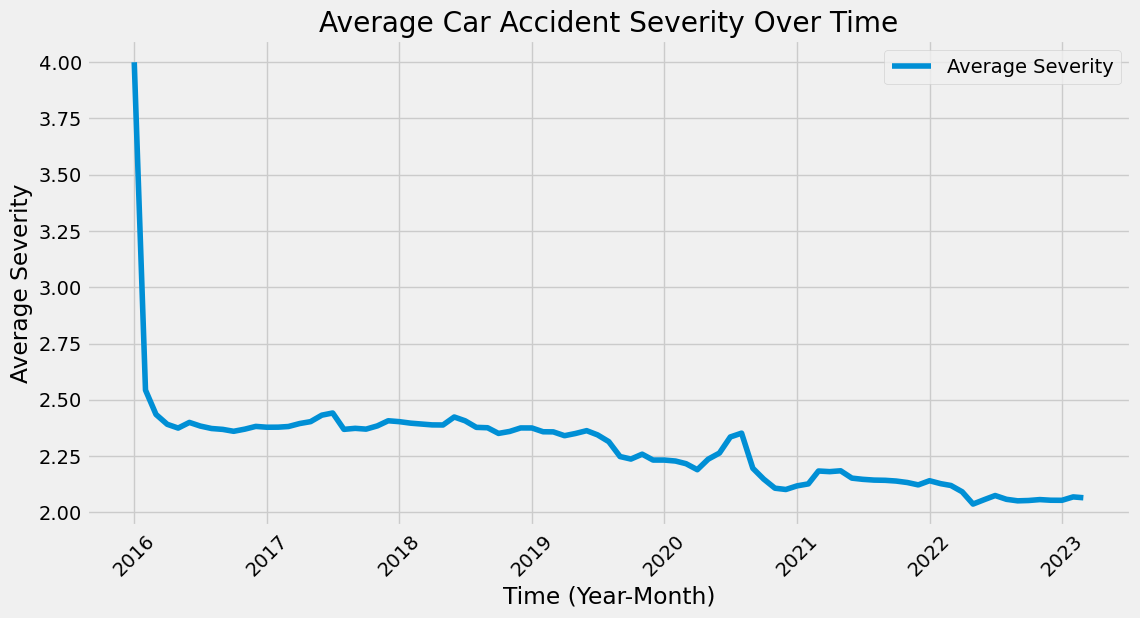

In [23]:
# Now plot the data
plt.figure(figsize=(12, 6))
plt.plot(severity_by_month.index, severity_by_month, label='Average Severity')
plt.title('Average Car Accident Severity Over Time')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Average Severity')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [24]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

In [25]:
# Decompose the time series
decomposition = seasonal_decompose(severity_by_month, model='additive', period=12)  # assuming monthly data

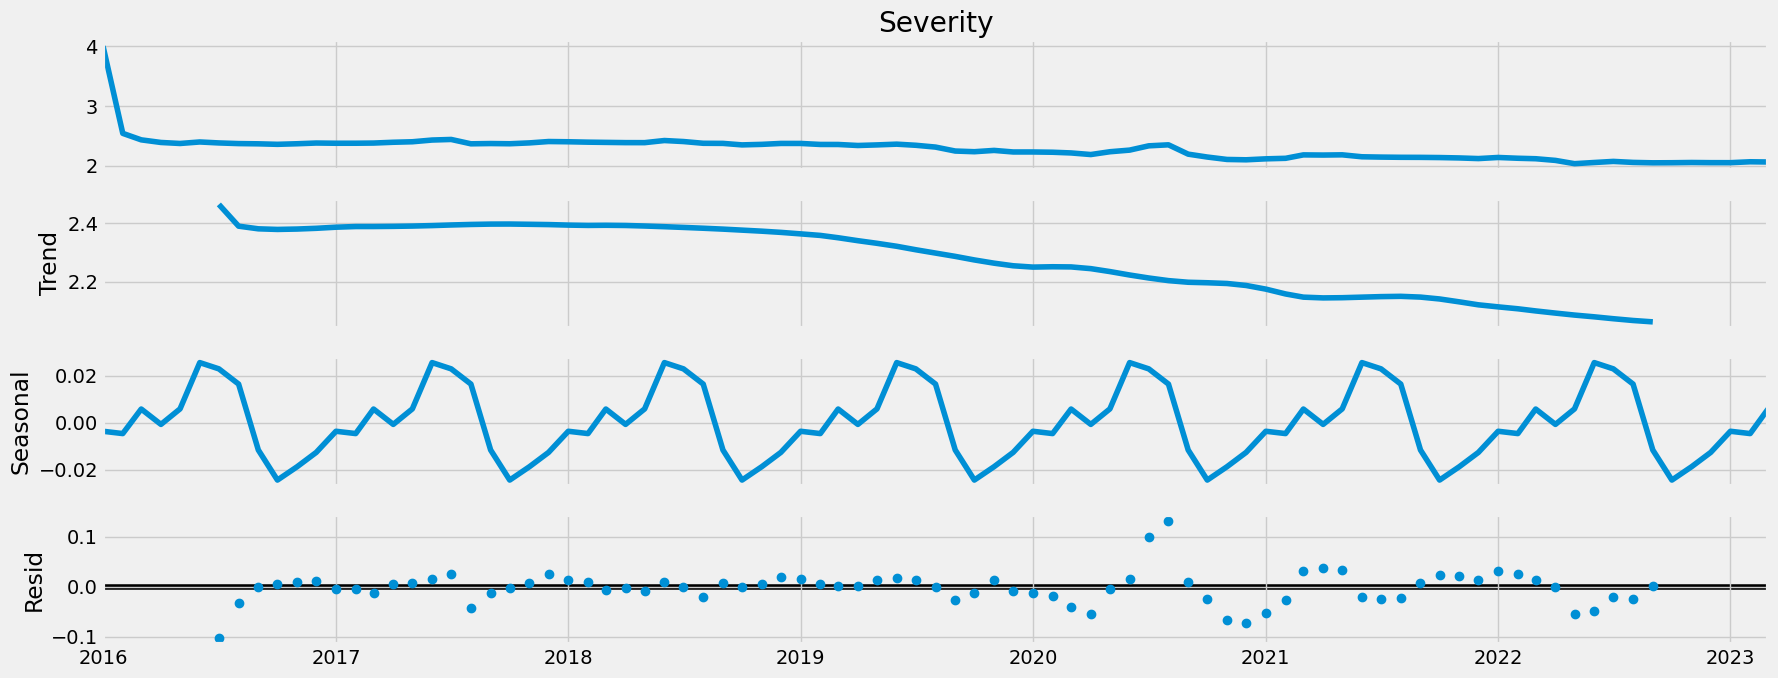

In [26]:
# Plot the decomposition
decomposition.plot()
plt.show()

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
# Decompose the car accidents per day data (assuming daily frequency)
accidents_per_day.index = pd.to_datetime(accidents_per_day.index)
decomposition = seasonal_decompose(accidents_per_day, model='additive', period=365)

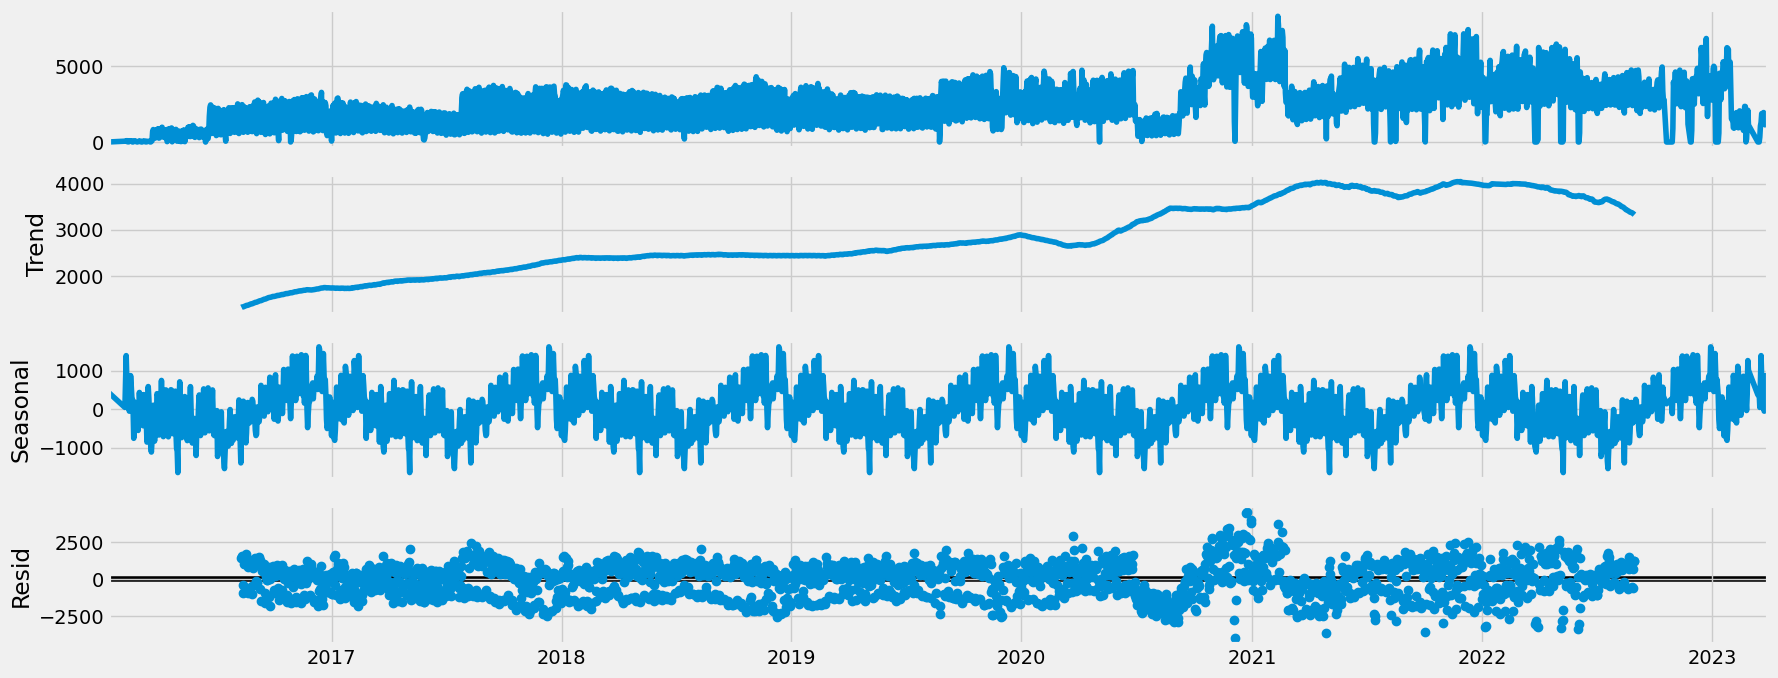

In [29]:
# Plot the decomposition components
decomposition.plot()
plt.show()

It appears that car accidents had increased from 2020 to 2023. The residiual shows a jump in car accidents in 2021. 

### Conducting the Dickey-Fuller test for Stationarity

In [30]:
from statsmodels.tsa.stattools import adfuller

In [31]:
# Perform Dickey-Fuller test on accidents per day
result = adfuller(accidents_per_day)
print(f'Dickey-Fuller test statistic: {result[0]}')
print(f'p-value: {result[1]}')

Dickey-Fuller test statistic: -3.332331931343727
p-value: 0.01349366173286843


In [32]:
# Interpretation
if result[1] > 0.05:
    print("The series is not stationary, we fail to reject the null hypothesis.")
else:
    print("The series is stationary, we reject the null hypothesis.")

The series is stationary, we reject the null hypothesis.


### Check Autocorrelations

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [34]:
from pandas.plotting import autocorrelation_plot


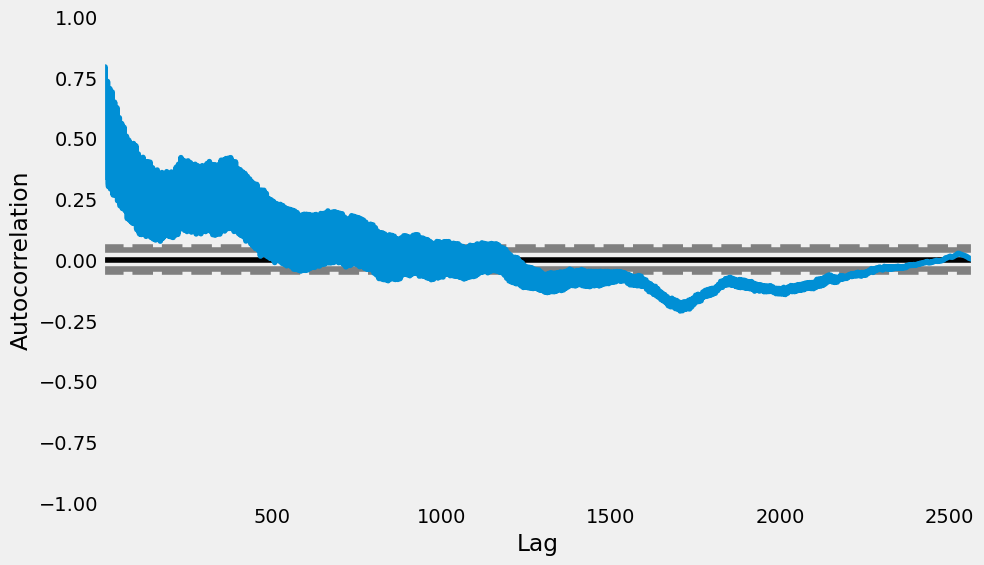

In [35]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(accidents_per_day)
plt.show()